In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
df = pd.read_csv("Dataset/IMDb_Movies_India.csv",encoding='ISO-8859-1')
df.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [6]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(5659, 10)

In [11]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [12]:
df.describe()

Year     Duration       Rating          Votes
count  5659.000000  5659.000000  5659.000000    5659.000000
mean   1996.247570   133.439124     5.898533    2697.649585
std      19.741839    25.319939     1.381165   13651.503584
min    1931.000000    21.000000     1.100000       5.000000
25%    1983.000000   119.000000     5.000000      30.000000
50%    2002.000000   135.000000     6.100000     131.000000
75%    2013.000000   150.000000     6.900000     922.500000
max    2021.000000   321.000000    10.000000  591417.000000

C:\Users\ROJA\AppData\Local\Temp\ipykernel_5084\3927813449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


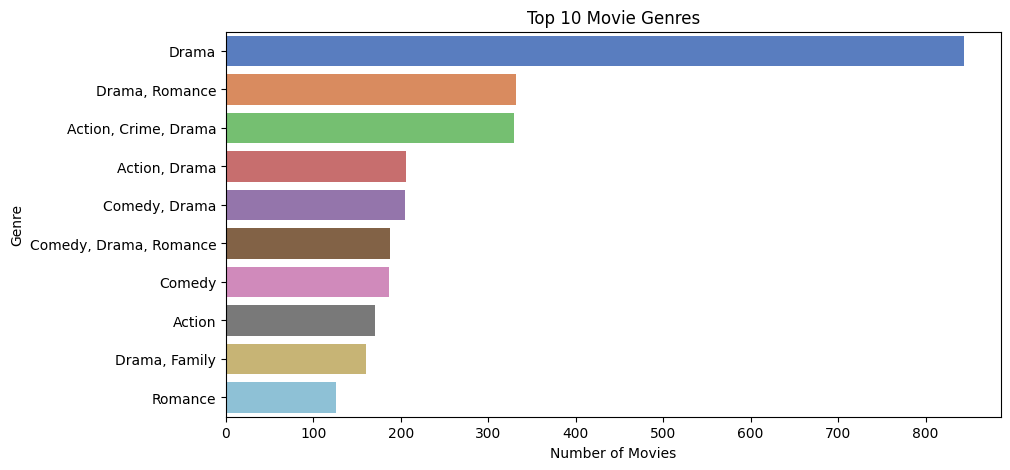

In [13]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

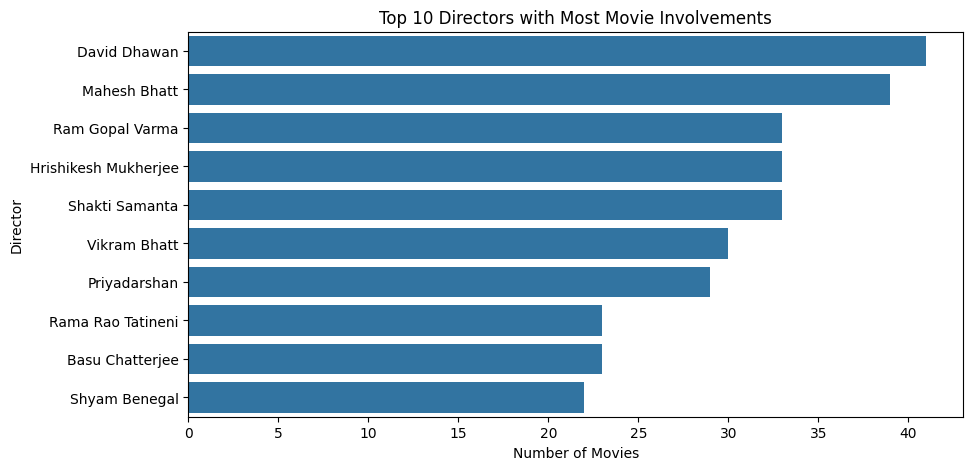

In [14]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index)
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

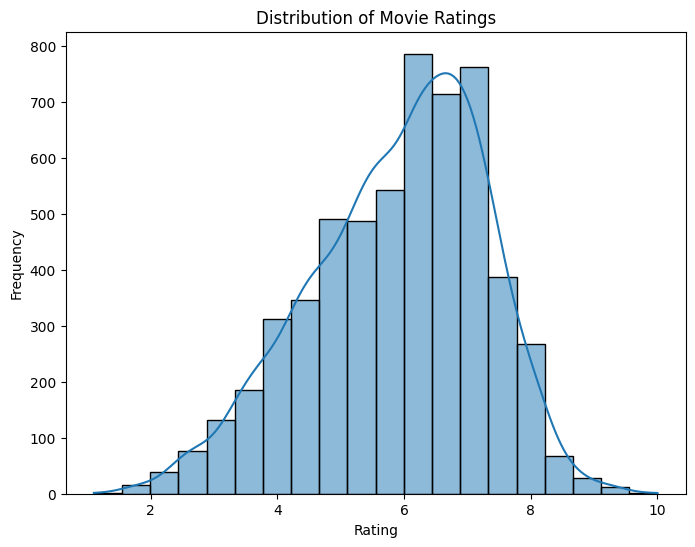

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [16]:
df['Genre_split'] = df['Genre'].str.split(', ')
df['Genre_split']

1                            [Drama]
3                  [Comedy, Romance]
5           [Comedy, Drama, Musical]
6              [Drama, Romance, War]
8        [Horror, Mystery, Thriller]
                    ...             
15493                        [Drama]
15494    [Biography, Drama, History]
15503         [Action, Crime, Drama]
15505                [Action, Drama]
15508                [Action, Drama]
Name: Genre_split, Length: 5659, dtype: object

In [17]:
all_genres = set(genre for genrelist in df['Genre_split'] for genre in genrelist)
print(all_genres)

{'Musical', 'Animation', 'Horror', 'Crime', 'Biography', 'Sport', 'History', 'Comedy', 'Adventure', 'Music', 'News', 'Documentary', 'Thriller', 'Drama', 'Mystery', 'Action', 'Romance', 'Western', 'Family', 'Sci-Fi', 'War', 'Fantasy'}


In [18]:
movies_df = df
for genre in all_genres:
    movies_df[genre] = movies_df['Genre'].apply(lambda x: 1 if genre in x else 0)

In [19]:
Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
movies_df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
movies_df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
movies_df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
movies_df['Actor3_Average_Rating'] =Actor3_Average_Rating


In [20]:
movies_dataframe = movies_df.drop(columns=['Genre', 'Director','Actor 1','Actor 2','Actor 3'], axis = 1,inplace=True)

In [23]:
movies_df.head(4)

Name  Year  Duration  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019       109     7.0      8   
3                             #Yaaram  2019       110     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997       147     4.7    827   
6                           ...Yahaan  2005       142     7.4   1086   

                Genre_split  Musical  Animation  Horror  Crime  ...  Romance  \
1                   [Drama]        0          0       0      0  ...        0   
3         [Comedy, Romance]        0          0       0      0  ...        1   
5  [Comedy, Drama, Musical]        1          0       0      0  ...        0   
6     [Drama, Romance, War]        0          0       0      0  ...        1   

   Western  Family  Sci-Fi  War  Fantasy  Director_Average_Rating  \
1        0       0       0    0        0                 7.000000   
3        0       0       0    0        0                 4.400000   
5        0       0       0    0        0                 5.313333   
6        0       0       0    1        0                 7.383333   

   Actor1_Average_Rating  Actor2_Average_Rating  Actor3_Average_Rating  
1               6.850000               7.000000               7.000000  
3               5.420000               4.400000               4.450000  
5               4.788889               5.786667               5.872727  
6               5.435000               6.933333               6.500000  

[4 rows x 32 columns]

In [42]:
X = movies_df.drop(["Name","Genre_split","Rating"],axis=1)
y = movies_df["Rating"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state= 1 )

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, mse))

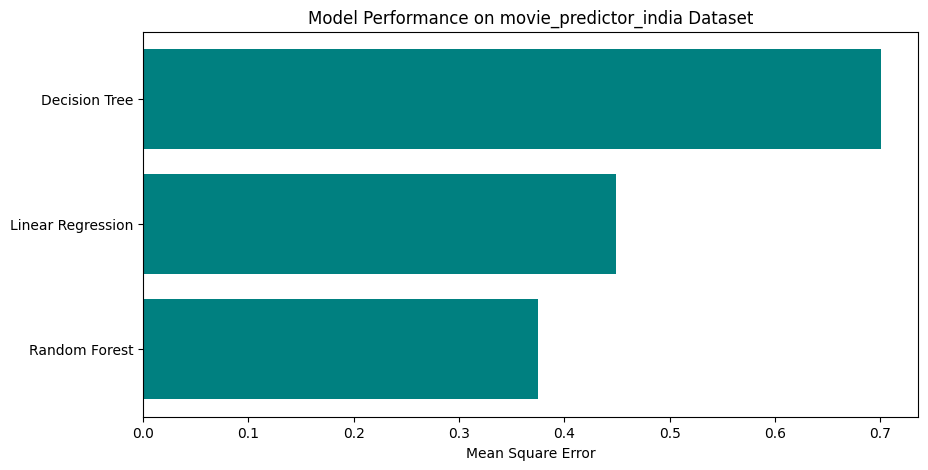

In [53]:
results.sort(key=lambda x: x[1], reverse=True)
names, scores = zip(*results)
plt.figure(figsize=(10, 5))
plt.barh(names, scores, color='teal')
plt.xlabel('Mean Square Error')
plt.title('Model Performance on movie_predictor_india Dataset')
plt.gca().invert_yaxis()
plt.show()